In [23]:
import torch
import matplotlib.pyplot as plt  
import torch.nn as nn  
import numpy as np 

In [24]:
#  Generate Input Data (X) and Output Data (y)
torch.manual_seed(71)  # For reproducibility
X = torch.linspace(0,50,100).reshape(-1,1)
print(X.shape)
print(X.ndim)

torch.Size([100, 1])
2


In [25]:
e = torch.randint(-9,9,(100,1))
print(e.shape)
y = X * 2 + e 
print(y.shape)

torch.Size([100, 1])
torch.Size([100, 1])


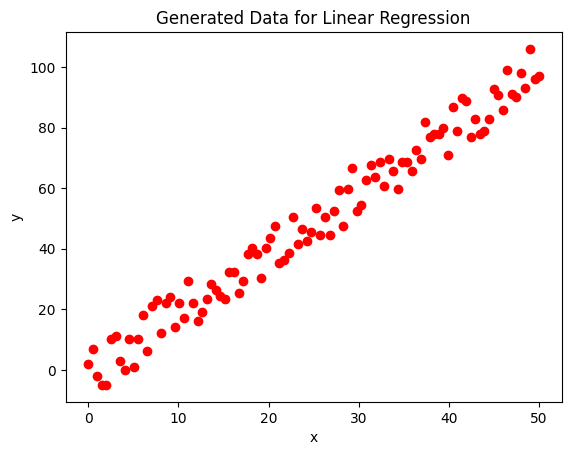

In [26]:
# Plot the original data
plt.scatter(X, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [27]:
# Define the Linear Model Class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)

    def forward(self, x):
        return self.linear(x)

In [28]:
# Initialize the Model
torch.manual_seed(59)  # Ensure same initial weights
model = Model(1, 1)

In [29]:
# Print Initial Weights and Bias
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print("\nName: Sai Sanjiv R")
print("Register No: 212223230179")
print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')


Name: Sai Sanjiv R
Register No: 212223230179
Initial Weight: 0.10597813, Initial Bias: 0.96379614



In [30]:
# Define Loss Function & Optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [31]:
# Train the Model
epochs = 100
losses = []

for epoch in range(1, epochs + 1):  # Loop over epochs
    y_pred = model(X)
    loss = loss_function(y_pred,y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
      print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')

epoch: 10  loss: 29.75342560  weight: 1.89186585  bias: 1.00628734
epoch: 20  loss: 27.28424072  weight: 1.92807543  bias: 0.99659085
epoch: 30  loss: 27.27175331  weight: 1.92911661  bias: 0.98589879
epoch: 40  loss: 27.26037025  weight: 1.92944944  bias: 0.97523981
epoch: 50  loss: 27.24910164  weight: 1.92976642  bias: 0.96463436
epoch: 60  loss: 27.23794937  weight: 1.93008149  bias: 0.95408255
epoch: 70  loss: 27.22691154  weight: 1.93039477  bias: 0.94358408
epoch: 80  loss: 27.21598434  weight: 1.93070686  bias: 0.93313879
epoch: 90  loss: 27.20516205  weight: 1.93101716  bias: 0.92274630
epoch: 100  loss: 27.19445801  weight: 1.93132591  bias: 0.91240638


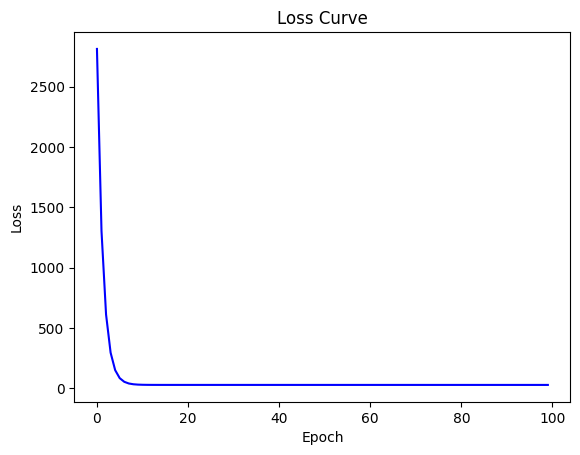

In [32]:
# Plot Loss Curve
plt.plot(range(epochs), losses, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.show()

In [33]:
# Final Weights & Bias
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()
print("\nName: Sai Sanjiv R")
print("Register No: 212223230179")
print(f'\nFinal Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}')


Name: Sai Sanjiv R
Register No: 212223230179

Final Weight: 1.93132591, Final Bias: 0.91240638


In [34]:
#  Best-Fit Line Calculation
x1 = torch.tensor([X.min().item(), X.max().item()]) # Find min and max values of X
y1 = x1 * final_weight + final_bias # Compute corresponding y-values using trained model

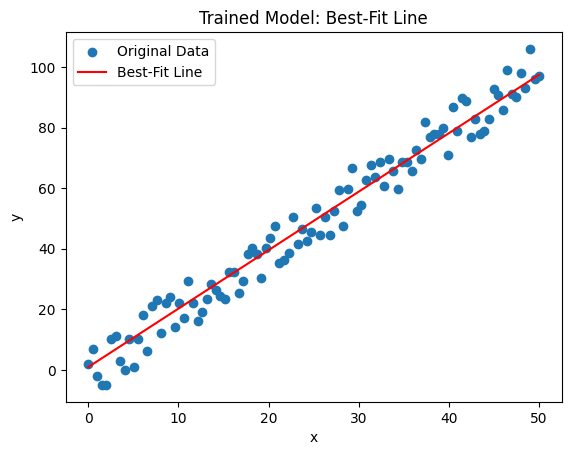

In [35]:
# Plot Original Data & Best-Fit Line
plt.scatter(X, y, label="Original Data")
plt.plot(x1, y1, 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [36]:
# Prediction for x = 120
x_new = torch.tensor([[120.0]])  # New input as a tensor
y_new_pred = model(x_new).item()  # Predict using trained model
print("\nName: Sai Sanjiv R")
print("Register No: 212223230179")
print(f"\nPrediction for x = 120: {y_new_pred:.8f}")


Name: Sai Sanjiv R
Register No: 212223230179

Prediction for x = 120: 232.67150879
